In [93]:
import numpy as np
import pandas as pd
import scipy.integrate as int
import scipy.optimize as op
import emcee
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.constants as const
import sys
from astropy.cosmology import wCDM
from astropy.cosmology import FlatLambdaCDM
import os

In [94]:
os.getcwd()

'/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae'

In [95]:
df = pd.read_csv('/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', sep = " ", header = 0)
df

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.88590,0.864470,0.0991,1.4960,0.0381,0.005,1.000,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.30640,0.812220,0.0971,1.4960,-0.0252,0.003,1.000,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.50000,0.000358,0.0399,0.7134,0.0545,0.019,1.000,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.12200,0.000193,0.0931,0.7134,0.0622,0.028,1.000,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.83900,0.988740,0.0567,0.6110,0.0650,0.009,1.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,rutledge,106,1.61505,0.00545,1.61499,0.00500,1.61399,0.00500,25.90650,0.331927,...,1.7256,8,2.92493,0.938980,0.2230,0.0106,-0.0203,0.005,1.000,0.002
1697,geta,106,1.69706,0.04006,1.69702,0.04000,1.70000,0.04000,26.03330,0.379521,...,1.8973,12,9.15387,0.689730,0.3209,0.0748,0.2680,0.005,0.633,0.000
1698,stone,106,1.80119,0.02014,1.80111,0.02000,1.80000,0.02000,26.23350,0.280685,...,1.1631,11,11.69320,0.387140,0.2370,0.0358,-0.0968,0.004,0.641,0.000
1699,wilson,106,1.91165,0.00263,1.91160,0.00100,1.91401,0.00100,26.17030,0.357624,...,1.4902,9,5.54378,0.784570,0.3168,0.0044,-0.3835,0.013,0.604,0.000


In [96]:
df.dtypes

CID                      object
IDSURVEY                  int64
zHD                     float64
zHDERR                  float64
zCMB                    float64
zCMBERR                 float64
zHEL                    float64
zHELERR                 float64
m_b_corr                float64
m_b_corr_err_DIAG       float64
MU_SH0ES                float64
MU_SH0ES_ERR_DIAG       float64
CEPH_DIST               float64
IS_CALIBRATOR             int64
USED_IN_SH0ES_HF          int64
c                       float64
cERR                    float64
x1                      float64
x1ERR                   float64
mB                      float64
mBERR                   float64
x0                      float64
x0ERR                   float64
COV_x1_c                float64
COV_x1_x0               float64
COV_c_x0                float64
RA                      float64
DEC                     float64
HOST_RA                   int64
HOST_DEC                  int64
HOST_ANGSEP             float64
VPEC    

In [97]:
arr = df.to_numpy()
arr

array([['2011fe', 51, 0.00122, ..., 0.005, 1.0, 0.003],
       ['2011fe', 56, 0.00122, ..., 0.003, 1.0, 0.004],
       ['2012cg', 51, 0.00256, ..., 0.019, 1.0, 0.036000000000000004],
       ...,
       ['stone', 106, 1.80119, ..., 0.004, 0.6409999999999999, 0.0],
       ['wilson', 106, 1.91165, ..., 0.013000000000000001, 0.604, 0.0],
       ['colfax', 106, 2.26137, ..., 0.009000000000000001,
        0.16399999999999998, 0.0]], dtype=object)

In [98]:
# extracting columns of interest
#temp = np.loadtxt('/Users/eoin/Documents/Projects/Cosmology/Pantheon+/Pantheon+.dat', usecols=(2, 8, 9, 10, 11, 12, 13), unpack=False)
ID, z0, mb0, mberr0, mu0, muerr0, muCP0, calibrator0 = np.loadtxt('/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', usecols=(1, 2, 8, 9, 10, 11, 12, 13), unpack=True, skiprows = 1)


In [99]:
df2= pd.read_csv("/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES_STAT+SYS.cov", header = 0)
df2

,1701
0,0.031771
1,0.005754
2,0.000310
3,0.001187
4,0.000083
...,...
2893396,0.007536
2893397,0.000743
2893398,0.005887
2893399,0.008751


In [100]:
# covariance matrix
cov0 = np.loadtxt(fname="/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES_STAT+SYS.cov", delimiter=",")
cov0

array([1.701000e+03, 3.177108e-02, 5.754430e-03, ..., 5.887030e-03,
       8.751110e-03, 4.499005e-02])

In [101]:
cov0.shape

(2893402,)

In [102]:
arr2 = df2.to_numpy()
arr2


array([[0.03177108],
       [0.00575443],
       [0.00031006],
       ...,
       [0.00588703],
       [0.00875111],
       [0.04499005]])

In [103]:
cov0 = np.reshape(arr2, (1701, 1701))

In [104]:
# isolating calibrators for determining M
x = calibrator0 == 1
cov1 = (cov0)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
z1 = z0[x]
mb1 = mb0[x]
mberr1 = mberr0[x]
mu1 = mu0[x]
muerr1 = muerr0[x]
muCP1 = muCP0[x]
Cinv1 = np.linalg.pinv(cov1)
len(cov1)

77

In [105]:
# remaining SN
x = calibrator0 == 0
cov2 = (cov0)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
z2 = z0[x]
mb2 = mb0[x]
mberr2 = mberr0[x]
mu2 = mu0[x]
muerr2 = muerr0[x]
muCP2 = muCP0[x]
calibrator2 = calibrator0[x]
Cinv2 = np.linalg.pinv(cov2)
len(cov2)

1624

In [106]:
# cutting the redshift range of the remaining SN
x = np.logical_and(0.9 < z2, z2 <= 2.5)
cov3 = (cov2)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
z3 = z2[x]
mb3 = mb2[x]
mberr3 = mberr2[x]
mu3 = mu2[x]
muerr3 = muerr2[x]
muCP3 = muCP2[x]
calibrator3 = calibrator2[x]
Cinv3 = np.linalg.pinv(cov3)
len(cov3)

27

In [107]:
# defining functions 
def integrand(z, om):
    return 1/np.sqrt(1-om+om*(1+z)**3)
    
def func(z, h0, om):
    res = 25+5*np.log10(const.c/1000) + 5*np.log10(1+z) - 5*np.log10(h0) + 5*np.log10(int.quad(integrand, 0.0, z, args =(om)))
    return res[0]

func = np.vectorize(func)

In [108]:
# defining likelihood
def lnlike(u):
    h0 = u[0]   
    om = u[1]
    M = u[2]
    
    Q1 = mb1-M-muCP1
    chi1 = -1/2*Q1.dot(Cinv1).dot(Q1)
    
    Q3 = mb3-func(z3, h0, om)-M
     
    chi2 = -1/2*Q3.dot(Cinv3).dot(Q3)
    
    #Q = []
    #sum = 0
    #for i in np.arange(0, len(z0), 1): 
    #        if calibrator0[i] == 1:
    #            Q.append(mb0[i]-M-muCP0[i])
    #        else: 
    #            Q.append(mb0[i]-func(z0[i], h0, om)-M)
    
    #Q = np.array(Q)
    
    #chi = -1/2*Q.dot(Cinv).dot(Q)            
    
    return chi1+chi2

In [109]:
# extremising likelihood
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [70, 0.3, -19.36], method = 'L-BFGS-B', bounds = ((0, 150),(0, 5),(-21, -19)), options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-15, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20})
h0, om, M = result["x"]
print(h0, om, M)
#print((h0/100)**2*om)

60.857472524046486 0.6042638480912967 -19.24888459238545


In [110]:
#output = []
#zrange = np.arange(0.1, 0.9, 0.1)
#for i in zrange:
    
#    x = np.logical_and(i-0.1 < z0, z0 <= i)
#    cov = (cov0)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
#    z = z0[x]
#    mu = mu0[x]
#    print(i, len(mu))
    
#    popt, pcov = op.curve_fit(func, z, mu, [70, 0.3], sigma=cov, bounds = ((0,0), (100, 1)), absolute_sigma=True)
#    h0, om = popt
    
#    output.append([popt[0], popt[1], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1])])

#output = np.array(output)

In [111]:
#H0, OM, H0err, OMerr = output.T
#new_zrange = np.linspace(0.1, 0.8, 91)
#f = interpolate.interp1d(zrange, OM, kind='cubic')
#ferr = interpolate.interp1d(zrange, OMerr, kind='cubic')
#new_OM = f(new_zrange); new_OMerr = ferr(new_zrange);
#g = interpolate.interp1d(zrange, H0, kind='cubic')
#gerr = interpolate.interp1d(zrange, H0err, kind='cubic')
#new_H0 = g(new_zrange); new_H0err = gerr(new_zrange);

In [112]:
#plt.plot(new_zrange, new_OM, 'r-')
#plt.plot(new_zrange, new_OM+new_OMerr, 'r--')
#plt.plot(new_zrange, new_OM-new_OMerr, 'r--')
#plt.errorbar(zrange, OM, yerr=OMerr, fmt='o')
#plt.fill_between(new_zrange, new_OM+new_OMerr, new_OM-new_OMerr, alpha=0.3)
#plt.fill_between(new_zrange, 0.3153+0.007, 0.3153+0.007, alpha=0.3, color='black')
#plt.xlabel('$z_{min}$', fontsize=15)
#plt.ylabel('$\Omega_m$', fontsize=15)
#plt.ylim(-1, 2)
#plt.savefig('pantheon+_zmin_vs_om.png', dpi=300)
#plt.show()

In [113]:
#plt.plot(new_zrange, new_H0, 'r-')
#plt.plot(new_zrange, new_H0+new_H0err, 'r--')
#plt.plot(new_zrange, new_H0-new_H0err, 'r--')
#plt.errorbar(zrange, H0, yerr=H0err, fmt='o')
#plt.fill_between(new_zrange, new_H0+new_H0err, new_H0-new_H0err, alpha=0.3)
#plt.hlines(67.36,0.1, 0.8)
#plt.xlabel('$z_{min}$', fontsize=15)
#plt.ylabel('$H_0$', fontsize=15)
#plt.savefig('pantheon+_zmin_vs_h0.png', dpi=300)
#plt.show()

In [114]:
# setting up MCMC
def lnprior(u):
    h0 = u[0]
    om = u[1]
    M = u[2]

    if 0 < h0 < 150 and 0 < om < 5 and -20 < M < -19: 
        return 0.0
    return -np.inf

In [115]:
def lnprob(u):
    lp = lnprior(u)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(u)

In [116]:
ndim, nwalkers = 3, 30
pos = [[h0, om, M] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [117]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

In [118]:
sampler.run_mcmc(pos, 20000, progress=True);

100%|██████████| 20000/20000 [1:04:55<00:00,  5.13it/s]


In [119]:
tau = sampler.get_autocorr_time()
print(tau)

[279.56965966 273.18526759  72.14767439]


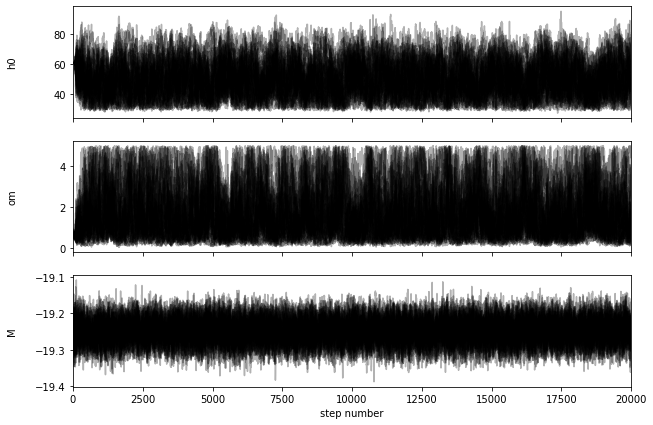

In [120]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["h0", "om", "M"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [121]:
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

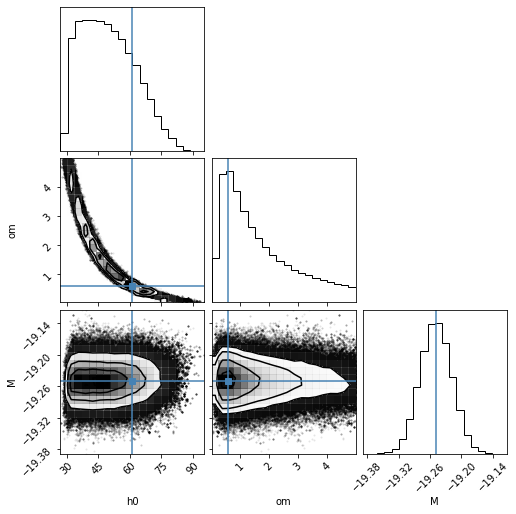

In [122]:
import corner
fig = corner.corner(samples, labels=["h0", "om", "M"], truths=[h0, om, M])
#fig.savefig("CC_BAO_SNe_bin4_corner.png")

In [123]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)

(39000, 3)


In [124]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    #err = 1/2*(q[0]+q[1])
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #txt = "\mathrm{{{2}}} = {0:.2f}\pm{{{1:.2f}}}"
    #txt = txt.format(mcmc[1], err, labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
np.median(flat_samples[:,0])

48.74457238318395

In [130]:
np.savetxt("SN_chain_zmin1_prior1.5.txt", flat_samples)

In [131]:
samples = np.loadtxt("SN_chain_zmin1_prior1.5.txt")
H0, OM, MB = samples.T

In [132]:
len(OM)

39000

In [133]:
np.diff(np.percentile(H0, [16, 50, 84]))

array([12.51035718, 14.79643958])

In [134]:
np.percentile(H0, [16, 50, 84])

array([36.2342152 , 48.74457238, 63.54101196])

In [135]:
zmin = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
zrange = np.linspace(0.25, 1.05)
h0 = np.array([72.01, 72.48, 76.47, 76.10, 78.76, 68.36, 52.14, 44.27])
h0p = np.array([1.39, 1.91, 2.49, 3.48, 4.37, 9.34, 13.27, 11.03])
h0m = np.array([1.37, 1.99, 2.72, 4.01, 4.96, 11.24, 10.37, 6.10])
h0_asym_err = [h0m,h0p]
om = np.array([0.39, 0.374, 0.264, 0.272, 0.221, 0.397, 1.047, 1.67])
omp = np.array([0.044, 0.064, 0.07, 0.110, 0.113, 0.411, 1.036, 0.889])
omm = np.array([0.041, 0.059, 0.057, 0.077, 0.074, 0.188, 0.589, 0.846])
om_asym_err = [omm,omp]

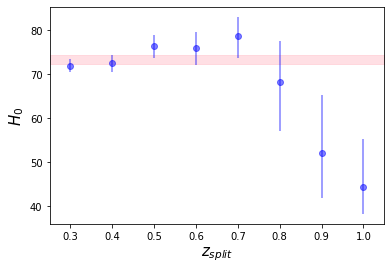

In [136]:
plt.fill_between(zrange, 73.41+0.97, 72.41, alpha=0.5, color='pink')
plt.errorbar(zmin, h0, yerr=h0_asym_err, fmt='bo', alpha=0.5)
plt.xlabel('$z_{split}$', fontsize=15)
plt.ylabel('$H_0$', fontsize=15)
plt.xlim(0.25, 1.05)
#plt.tight_layout()
#plt.savefig('h0_vs_z.png', dpi=300)
plt.show()

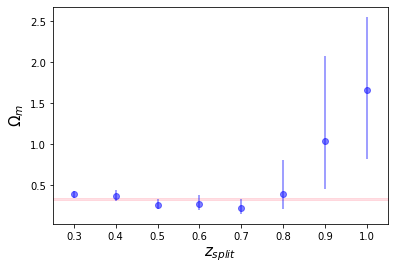

In [137]:
plt.fill_between(zrange, 0.333+0.018, 0.333-0.017, alpha=0.5, color='pink')
plt.errorbar(zmin, om, yerr=om_asym_err, fmt='bo', alpha=0.5)
plt.xlabel('$z_{split}$', fontsize=15)
plt.ylabel('$\Omega_m$', fontsize=15)
plt.xlim(0.25, 1.05)
#plt.tight_layout()
#plt.savefig('om_vs_z.png', dpi=300)
plt.show()